# Medical research

## EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,Flu,Moderate,Medication and rest
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,Bronchitis,Severe,Hospitalization and medication
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,Healthy,Mild,Rest and fluids
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,Cold,Mild,Rest and fluids
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,Flu,Moderate,Medication and rest


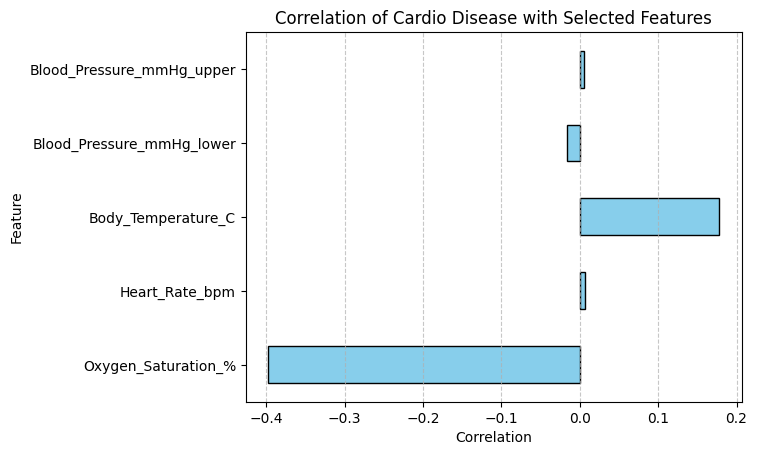

In [4]:
# Medical research
data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

display(data.head(10))

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)


selected_fields = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg_lower', 'Blood_Pressure_mmHg_upper']

data['treatment_plan_int'] = data['Treatment_Plan'].map({'Medication and rest': 1, 
                                                         'Rest and fluids': 0, 
                                                         'Hospitalization and medication': 2})

correlation_results = data[selected_fields].corrwith(data["treatment_plan_int"])

correlation_results.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Cardio Disease with Selected Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [5]:
print(min(data['Body_Temperature_C']), max(data['Body_Temperature_C']))
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))

35.5 40.0


2000 2000
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       267
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        75

    accuracy                           0.67       400
   macro avg       0.22      0.33      0.27       400
weighted avg       0.45      0.67      0.53       400



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

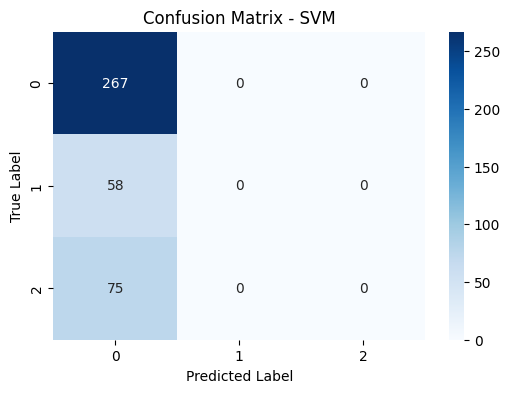

In [6]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age']

X = data[numerical_features]
y = data['treatment_plan_int']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# initialize svm classifier
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# Ensamble model application: XGBoost

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,...,Severity,Treatment_Plan,Blood_Pressure_mmHg_lower,Blood_Pressure_mmHg_upper,Body_Temperature_C_scaled,Gender_encoded,Treatment_Plan_encoded,Symptom_1_encoded,Symptom_2_encoded,Symptom_3_encoded
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,...,Moderate,Medication and rest,91,132,0.866667,1,1,2,7,3
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,...,Mild,Rest and fluids,98,174,0.777778,0,2,7,2,1
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,...,Mild,Rest and fluids,60,136,0.288889,1,2,0,7,2
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,...,Mild,Rest and fluids,82,147,0.755556,0,2,6,4,1
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,...,Mild,Rest and fluids,106,109,0.244444,1,2,5,7,2
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,...,Moderate,Medication and rest,92,107,0.888889,1,1,7,3,1
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,...,Severe,Hospitalization and medication,82,126,0.444444,1,0,7,2,1
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,...,Mild,Rest and fluids,99,153,0.688889,1,2,4,6,5
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,...,Mild,Rest and fluids,71,152,0.155556,0,2,6,3,4
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,...,Moderate,Medication and rest,104,111,0.888889,1,1,1,3,4


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       1.00      0.95      0.97        58
           2       1.00      1.00      1.00       267

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



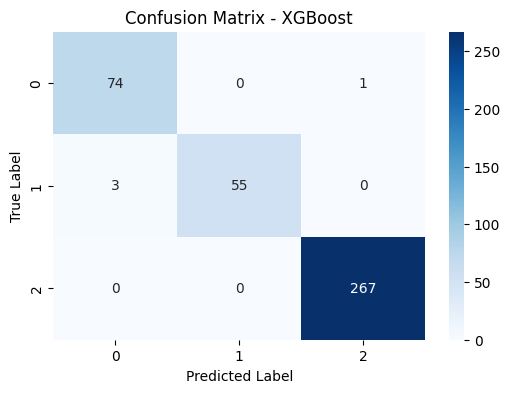

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

# Data Encoding
data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))


data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])

display(data.head(10))

features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 
                      'Gender_encoded', 'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

# Load dataset
X = data[features]
y = data['Treatment_Plan_encoded']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create XGBoost model (scikit-learn style)
model = XGBClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of trees
    subsample=0.8,           # fraction of samples used per tree
    colsample_bytree=0.8,    # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'   # avoids warning
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Random Forest (?)

Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.43      0.29      0.35        75
           1       0.38      0.26      0.31        58
           2       0.73      0.84      0.78       267

    accuracy                           0.66       400
   macro avg       0.51      0.46      0.48       400
weighted avg       0.62      0.66      0.63       400



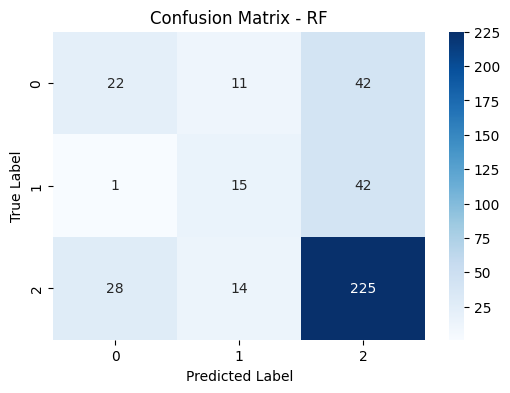

[Text(0.5625, 0.9, 'Oxygen_Saturation_% <= 94.5\ngini = 0.501\nsamples = 1600\nvalue = [303, 234, 1063]\nclass = 2'),
 Text(0.3333333333333333, 0.7, 'Body_Temperature_C_scaled <= 0.567\ngini = 0.589\nsamples = 787\nvalue = [303, 91, 393]\nclass = 2'),
 Text(0.44791666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'Blood_Pressure_mmHg_lower <= 60.5\ngini = 0.48\nsamples = 453\nvalue = [181, 0, 272]\nclass = 2'),
 Text(0.08333333333333333, 0.3, 'Body_Temperature_C_scaled <= 0.144\ngini = 0.375\nsamples = 12\nvalue = [9, 0, 3]\nclass = 0'),
 Text(0.041666666666666664, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 0, 2]\nclass = 2'),
 Text(0.125, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 0, 1]\nclass = 0'),
 Text(0.25, 0.3, 'Age <= 66.5\ngini = 0.476\nsamples = 441\nvalue = [172, 0, 269]\nclass = 2'),
 Text(0.20833333333333334, 0.1, 'gini = 0.463\nsamples = 359\nvalue = [131.0, 0.0, 228.0]\nclass = 2'),
 Text(0.2916666666666667, 0.1, 'gini = 0.5\nsamples = 82\nvalue = [41, 0,

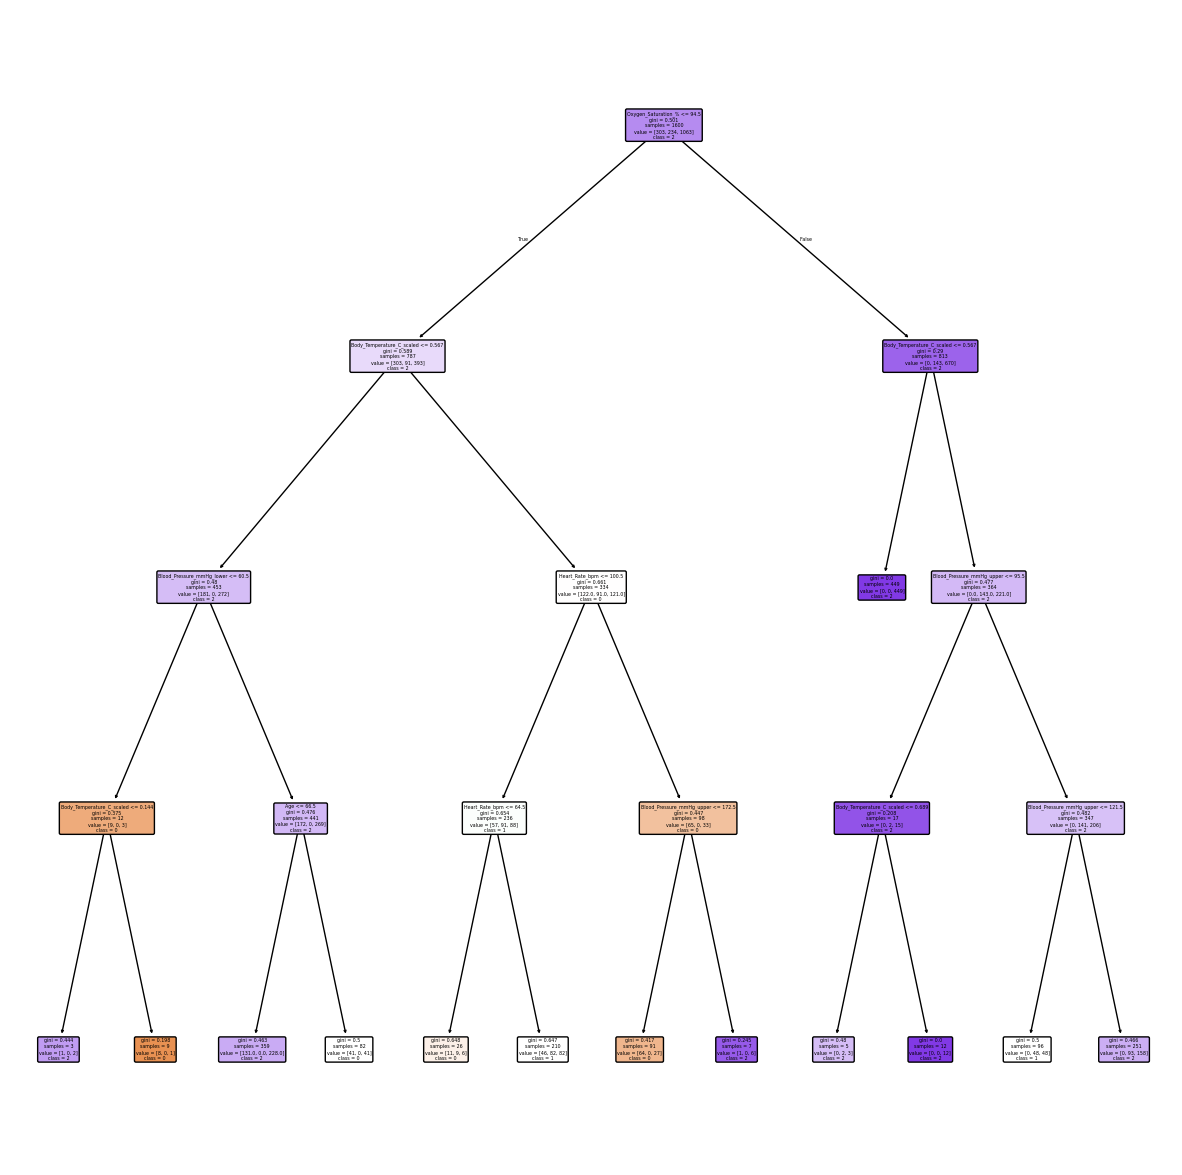

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
X = data[numerical_features]
y = data['Treatment_Plan_encoded']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF")
plt.show()

plt.figure(figsize=(15,15))
plot_tree(dt_model, filled=True, feature_names=numerical_features, class_names=["0", "1", "2"], rounded=True)

TODO:
- CNN (?) 
- More data, include symptoms, one hot encoding for symptoms 
- nlp for symptoms, transformers ?
- encoding for str features, + gridsearch improve + bayesian hyperparameter tuning

**Grid search hyperparameter tuning**

2000 2000
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       1.00      0.83      0.91        58
           2       0.95      1.00      0.98       267

    accuracy                           0.96       400
   macro avg       0.97      0.92      0.94       400
weighted avg       0.96      0.96      0.96       400



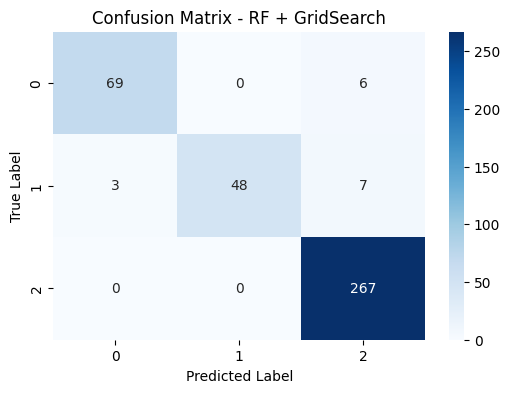

In [14]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()



data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded',
                      'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

X = data[numerical_features]
y = data['Treatment_Plan_encoded']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [None, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7],
    "min_samples_leaf": [1, 2, 3, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

# # initialize svm classifier
# svm_model = SVC(kernel="rbf", probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, grid_predictions):.4f}")
print(classification_report(y_test, grid_predictions))

# confusion matrix:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF + GridSearch")
plt.show()

## XGBoost (to reduce data bias) + Bayessian Hyperparameter tunning (to find the most optimal hyperparameters with least o(n))

2000 2000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, tota

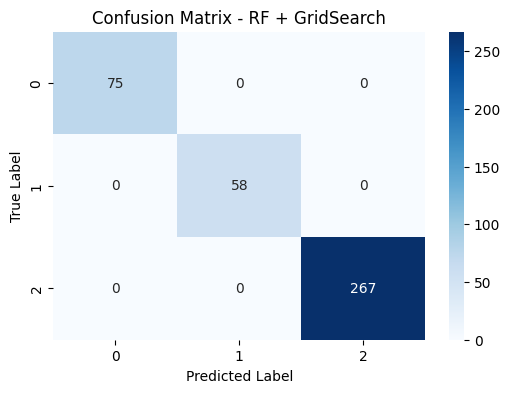

In [16]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from skopt import BayesSearchCV

le = LabelEncoder()



data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded',
                      'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

X = data[numerical_features]
y = data['Treatment_Plan_encoded']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_space = {
    # Tree parameters
    "max_depth": [3, 4, 5, 6, 8, 10],
    "min_child_weight": [1, 2, 3, 5, 7, 10],
    # "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    # "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    # "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

    # Learning parameters
    # "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 400, 600, 800, 1000],

    # Regularization
    # "reg_alpha": [0, 0.001, 0.01, 0.1, 1],
    # "reg_beta": [0, 0.001, 0.01, 0.1, 1],  # (older versions use reg_lambda)
    # "lambda": [0, 0.001, 0.01, 0.1, 1],

    # Imbalance handling
    # "scale_pos_weight": [1, 2, 3, 5, 10, 20],

    # Tree construction algorithm
    # "tree_method": ["auto", "exact", "approx", "hist"],
}

grid = BayesSearchCV(XGBClassifier(), param_space, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

# # initialize svm classifier
# svm_model = SVC(kernel="rbf", probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, grid_predictions):.4f}")
print(classification_report(y_test, grid_predictions))

# confusion matrix:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF + GridSearch")
plt.show()

## Todo

- add nlp (use datasets - which ones?)
- 

## Applying NLP for medical data

In [1]:
import pandas as pd

data = pd.read_csv('../resources/medical/Diseases_Symptoms.csv')
display(data.head(10))
print(data.info())

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",NaN,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True
5,Subdural hemorrhage,"Headache, confusion, dizziness, nausea or vomi...","Immediate medical attention, close monitoring ...",D006,False,True
6,Poisoning due to Antidepressants,"Nausea, vomiting, drowsiness, dizziness, confu...",Seek immediate medical assistance or contact a...,D007,False,True
7,Mittelschmerz,Lower abdominal pain and discomfort occurring ...,Pain management (over-the-counter pain relieve...,D008,False,True
8,Cornea Infection,"Eye redness, pain or discomfort, blurred or de...","Antibiotic or antifungal eye drops, oral medic...",D009,False,True
9,Myopia,"Blurred distance vision, eyestrain, squinting","Eyeglasses, contact lenses, refractive surgery...",D010,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          405 non-null    object
 1   Symptoms      405 non-null    object
 2   Treatments    404 non-null    object
 3   Disease_Code  405 non-null    object
 4   Contagious    405 non-null    bool  
 5   Chronic       405 non-null    bool  
dtypes: bool(2), object(4)
memory usage: 13.6+ KB
None


In [2]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\utils.py:35: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.sparse


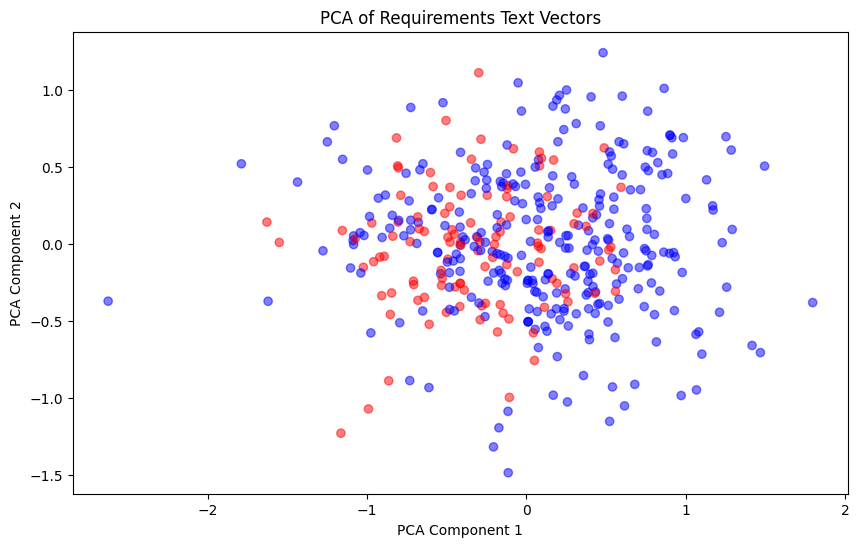

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
import numpy as np

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)
# display(data[['Email Text', 'Text_Vector']].head())

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
text_vectors = np.vstack(data['Text_Vector'].values)
reduced_vectors = pca.fit_transform(text_vectors)
data['PCA_1'] = reduced_vectors[:, 0]
data['PCA_2'] = reduced_vectors[:, 1]

colors = data["Contagious"].map({True: "red", False: "blue"})

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA_1'], data['PCA_2'], c=colors, alpha=0.5)
plt.title('PCA of Requirements Text Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## Apply ML to forecasting disease diagnosis

405 405
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.78      0.61      0.68        23

    accuracy                           0.84        81
   macro avg       0.82      0.77      0.79        81
weighted avg       0.83      0.84      0.83        81



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:31:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


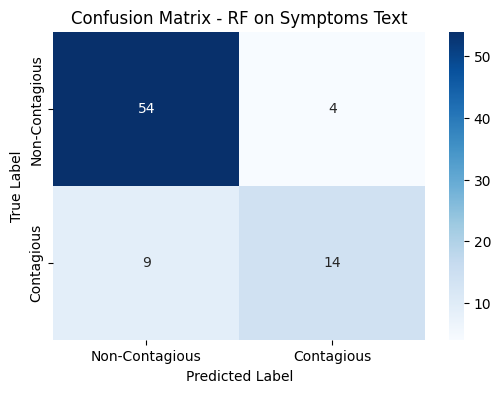

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)

X = np.vstack(data['Text_Vector'].values)
y = data['Contagious'].astype(int)
print(len(X), len(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = XGBClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of trees
    subsample=0.8,           # fraction of samples used per tree
    colsample_bytree=0.8,    # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'   # avoids warning
)

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Contagious", "Contagious"], yticklabels=["Non-Contagious", "Contagious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF on Symptoms Text")
plt.show()


Articles:

- Text Messaging-Based Medical Diagnosis Using Natural Language Processing and Fuzzy Logic https://onlinelibrary.wiley.com/doi/10.1155/2020/8839524
- Natural language processing applied to mental illness detection: a narrative review https://www.nature.com/articles/s41746-022-00589-7.pdf?utm_source=consensus
- 
- 



In [3]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

### Random forest feature selection + SVM 

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic,Text_Vector
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",NaN,D001,False,False,"[-0.11778298, 0.0831611, 0.35716012, -0.309445..."
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False,"[0.017962141, 0.23373856, 0.18703029, -0.14336..."
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True,"[-0.2586427, 0.09754197, 0.10086646, -0.142133..."
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True,"[-0.21580148, -0.02310945, 0.39595717, -0.1863..."
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True,"[0.012487052, 0.23298061, 0.26624373, -0.02003..."
5,Subdural hemorrhage,"Headache, confusion, dizziness, nausea or vomi...","Immediate medical attention, close monitoring ...",D006,False,True,"[0.007021137, -0.11848998, 0.45594934, -0.0501..."
6,Poisoning due to Antidepressants,"Nausea, vomiting, drowsiness, dizziness, confu...",Seek immediate medical assistance or contact a...,D007,False,True,"[-0.07920988, -0.19184393, 0.3729355, -0.05862..."
7,Mittelschmerz,Lower abdominal pain and discomfort occurring ...,Pain management (over-the-counter pain relieve...,D008,False,True,"[-0.12563664, 0.110919096, 0.30445647, 0.09180..."
8,Cornea Infection,"Eye redness, pain or discomfort, blurred or de...","Antibiotic or antifungal eye drops, oral medic...",D009,False,True,"[-0.03538808, 0.063501194, 0.25405312, -0.0747..."
9,Myopia,"Blurred distance vision, eyestrain, squinting","Eyeglasses, contact lenses, refractive surgery...",D010,False,False,"[-0.03821457, -0.09399272, 0.33678916, 0.16295..."


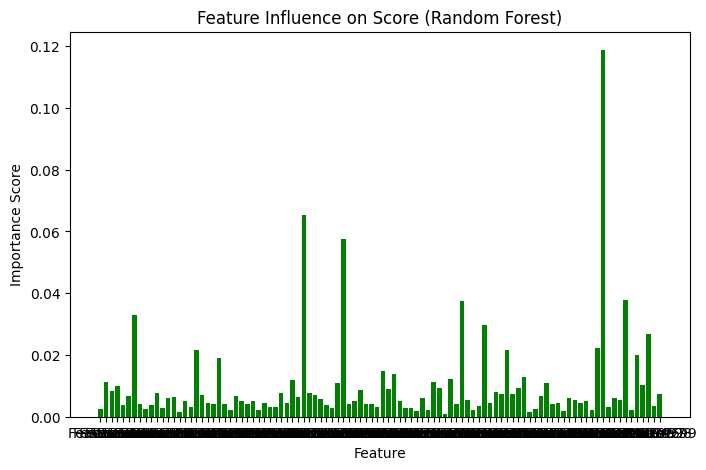

       Feature  Importance
89  Feature 89    0.118754
36  Feature 36    0.065454
43  Feature 43    0.057525
93  Feature 93    0.037647
64  Feature 64    0.037569
6    Feature 6    0.033021
68  Feature 68    0.029646
97  Feature 97    0.026792
88  Feature 88    0.022189
17  Feature 17    0.021742
Top 10 important features (indices): [89, 36, 43, 93, 64, 6, 68, 97, 88, 17]


,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic,Text_Vector,Text_Vector_Important
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",NaN,D001,False,False,"[-0.11778298, 0.0831611, 0.35716012, -0.309445...","[-0.04282335, 0.06243278, -0.28982225, 0.26318..."
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False,"[0.017962141, 0.23373856, 0.18703029, -0.14336...","[-0.22574499, 0.13848785, -0.7139172, 0.537449..."
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True,"[-0.2586427, 0.09754197, 0.10086646, -0.142133...","[-0.295794576, 0.067977272, -0.45073846, 0.299..."
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True,"[-0.21580148, -0.02310945, 0.39595717, -0.1863...","[0.024130635, 0.354346901, -0.287306517, 0.148..."
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True,"[0.012487052, 0.23298061, 0.26624373, -0.02003...","[-0.14348964, 0.33901536, -0.53768015, 0.01847..."
5,Subdural hemorrhage,"Headache, confusion, dizziness, nausea or vomi...","Immediate medical attention, close monitoring ...",D006,False,True,"[0.007021137, -0.11848998, 0.45594934, -0.0501...","[-0.213762537, 0.56681931, -0.807917953, 0.293..."
6,Poisoning due to Antidepressants,"Nausea, vomiting, drowsiness, dizziness, confu...",Seek immediate medical assistance or contact a...,D007,False,True,"[-0.07920988, -0.19184393, 0.3729355, -0.05862...","[-0.18416604, 0.5172361, -0.7323939, 0.3630674..."
7,Mittelschmerz,Lower abdominal pain and discomfort occurring ...,Pain management (over-the-counter pain relieve...,D008,False,True,"[-0.12563664, 0.110919096, 0.30445647, 0.09180...","[-0.2263181, 0.0898909, -0.386781, 0.32881, 0...."
8,Cornea Infection,"Eye redness, pain or discomfort, blurred or de...","Antibiotic or antifungal eye drops, oral medic...",D009,False,True,"[-0.03538808, 0.063501194, 0.25405312, -0.0747...","[-0.06066386, 0.22796346, -0.4300882, 0.136498..."
9,Myopia,"Blurred distance vision, eyestrain, squinting","Eyeglasses, contact lenses, refractive surgery...",D010,False,False,"[-0.03821457, -0.09399272, 0.33678916, 0.16295...","[-0.0107592857, 0.0615042821, -0.271444589, 0...."


[-0.11778298  0.0831611   0.35716012 -0.30944583  0.00310333  0.1258081
 -0.25759256  0.22217354 -0.19728066 -0.11783759  0.22191678 -0.26449707
  0.5241468   0.17423756  0.3400411  -0.07088801 -0.12390334 -0.27763632
 -0.24736966 -0.1616971   0.19449776  0.10172268  0.31512854  0.00251233
  0.69514805  0.42463642 -0.05471867 -0.31900668  0.09740905 -0.13401689
  0.1332706   0.29208767 -0.02128312  0.05866067 -0.19055144  0.29348478
  0.06243278  0.2348871   0.136581    0.13395222 -0.13040978 -0.42740864
  0.04370023 -0.28982225 -0.30808446  0.100644    0.18370543  0.05783834
 -0.0181094  -0.5428033  -0.09813803 -0.09355044  0.05115223  1.1532366
 -0.398843   -1.98006     0.10733312 -0.26408657  1.2491033   0.35476556
  0.18167332  1.0183656  -0.07224343  0.33825275  0.6468578  -0.07343467
  0.50219434  0.01762889  0.3682424  -0.42330763 -0.05113056 -0.16873223
  0.06403489 -0.26328555  0.33747208  0.08687712 -0.3779277   0.32973954
 -0.46278942  0.02741934  0.6572878   0.1857011  -0.4

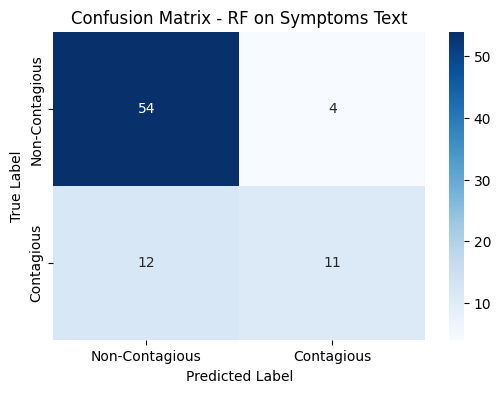

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import SVC

data = pd.read_csv('../resources/medical/Diseases_Symptoms.csv')

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

def select_top_features(vector: str, indices):
    vector_array = np.fromstring(vector.strip("[]"), sep=" ")
    return vector_array[indices]

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)
display(data.head(10))

X = np.vstack(data['Text_Vector'].values)
y = data['Contagious'].astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
importance_rf = rf.feature_importances_

feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_names, importance_rf, color="green")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Influence on Score (Random Forest)")
plt.show()

# Print feature importance
feature_importance_rf = pd.DataFrame({"Feature": feature_names, "Importance": importance_rf})
print(feature_importance_rf.sort_values(by="Importance", ascending=False)[:10])

feature_dictionary = {i: importance_rf[i] for i in range(len(importance_rf))}
important_features = sorted(feature_dictionary, key=feature_dictionary.get, reverse=True)[:10]
print("Top 10 important features (indices):", important_features)

data['Text_Vector_Important'] = data['Text_Vector'].apply(str).apply(select_top_features, args=([important_features]))
display(data.head(10))

print(data.iloc[0]['Text_Vector'])
print(data.iloc[0]['Text_Vector_Important'])



X = np.vstack(data['Text_Vector_Important'].values)
y = data['Contagious'].astype(int)
print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = SVC(kernel="rbf", probability=True, random_state=42)

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Contagious", "Contagious"], yticklabels=["Non-Contagious", "Contagious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF on Symptoms Text")
plt.show()

## Hyperparameter tunning on XGBoost

In [15]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

405 405
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totall

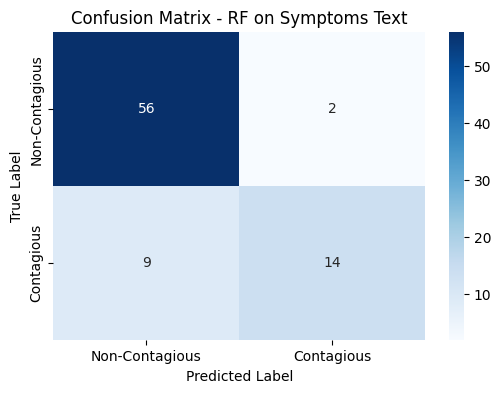

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
from skopt import BayesSearchCV

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)

X = np.vstack(data['Text_Vector'].values)
y = data['Contagious'].astype(int)
print(len(X), len(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_space = {
    # Tree parameters
    "max_depth": [3, 4, 5, 6, 8, 10],
    "min_child_weight": [1, 2, 3, 5, 7, 10],
    # "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    # "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    # "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

    # Learning parameters
    # "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 400, 600, 800, 1000],

    # Regularization
    # "reg_alpha": [0, 0.001, 0.01, 0.1, 1],
    # "reg_beta": [0, 0.001, 0.01, 0.1, 1],  # (older versions use reg_lambda)
    # "lambda": [0, 0.001, 0.01, 0.1, 1],

    # Imbalance handling
    # "scale_pos_weight": [1, 2, 3, 5, 10, 20],

    # Tree construction algorithm
    # "tree_method": ["auto", "exact", "approx", "hist"],
}

grid = BayesSearchCV(XGBClassifier(), param_space, refit = True, verbose = 3,n_jobs=-1) 

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = XGBClassifier(
#     n_estimators=100,        # number of trees
#     learning_rate=0.1,       # step size shrinkage
#     max_depth=3,             # depth of trees
#     subsample=0.8,           # fraction of samples used per tree
#     colsample_bytree=0.8,    # fraction of features used per tree
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss'   # avoids warning
# )

# Train model
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Contagious", "Contagious"], yticklabels=["Non-Contagious", "Contagious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF on Symptoms Text")
plt.show()


## Transformer application

In [2]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


data = pd.read_csv('../resources/medical/Diseases_Symptoms.csv')
data["Chronic"] = data["Chronic"].astype(int)

train_df, val_df = train_test_split(
    data,
    test_size=0.2,
    stratify=data["Chronic"],
    random_state=42
)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

model_name = "emilyalsentzer/Bio_ClinicalBERT"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2
)

def tokenize(batch):
    return tokenizer(
        batch["Symptoms"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)

train_ds = train_dataset.rename_column("Chronic", "labels")
val_ds = val_dataset.rename_column("Chronic", "labels")
train_ds.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "labels"]
)
val_ds.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "labels"]
)

training_args = TrainingArguments(
    output_dir="./medical",
    # evaluate_during_training=True,
    logging_steps=50,
    save_steps=500,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs"
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "roc_auc": roc_auc_score(labels, logits[:,1])
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 81/81 [00:00<00:00, 5221.69 examples/s]
C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_23892\2517379731.py:82: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,0.585100
100,0.519000


TrainOutput(global_step=123, training_loss=0.5373922518598355, metrics={'train_runtime': 847.0947, 'train_samples_per_second': 1.147, 'train_steps_per_second': 0.145, 'total_flos': 127871972904960.0, 'train_loss': 0.5373922518598355, 'epoch': 3.0})

In [3]:
def predict_chronicity(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=256
    )

    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.softmax(outputs.logits, dim=1)
    return {
        "non_chronic": float(probs[0,0]),
        "chronic": float(probs[0,1])
    }

sample_text = "Patient experiences frequent headaches and occasional dizziness."
prediction = predict_chronicity(sample_text)
print(f"Prediction for sample text: {prediction}")

Prediction for sample text: {'non_chronic': 0.2357965111732483, 'chronic': 0.7642034888267517}


,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
131,Hypothyroidism,"Fatigue, weight gain, sensitivity to cold, dry...",Hormone replacement therapy with synthetic thy...,D132,True,1
396,Obesity,"Excessive body weight, increased risk of chron...","Antifungal medication eg Amphotericin B, Fluc...",D387,False,1
9,Myopia,"Blurred distance vision, eyestrain, squinting","Eyeglasses, contact lenses, refractive surgery...",D010,False,0
177,Benzodiazepine Use Disorder,"Sedation, relaxation, reduced anxiety, drowsin...",Gradual tapering off benzodiazepines under med...,D178,False,1
331,Chronic Rheumatic Fever,"Joint pain, fever, rash, heart inflammation",Antibiotics (to treat streptococcal infections...,D325,True,1


[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]


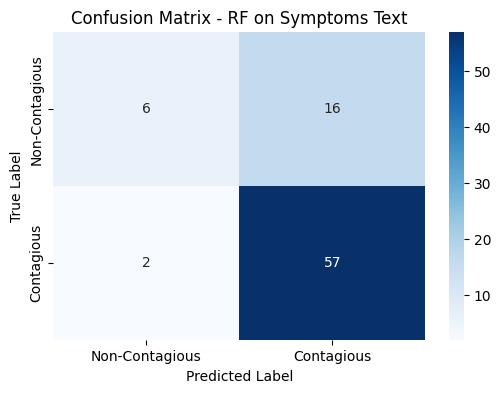

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import math
import seaborn as sns
import matplotlib.pyplot as plt

display(val_df.head())

symptoms = val_df['Symptoms'].tolist()
chronic = val_df['Chronic'].astype(int).tolist()
predictions = [predict_chronicity(text) for text in symptoms]
predictions_int = [round(x["chronic"]) for x in predictions]

print(chronic)
print(predictions_int)
cm = confusion_matrix(chronic, predictions_int)
# print(classification_report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Chronic", "Chronic"], yticklabels=["Non-Chronic", "Chronic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF on Symptoms Text")
plt.show()

Todo:
- improve feature selection algorithm (whitening selected vector?)
- hyperparameter tuning ?
- try another dataset !
- find other dataset, find dataset with text+numerical +
- fuzzy logic implementation !
- transformers implementation - try different transformer models - may be pretrain transformers ?
- NER (named entity recognition) 

## NER

pip install scikit-learn pandas numpy spacy scispacy

pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz

              precision    recall  f1-score   support

           0       0.52      0.73      0.60        22
           1       0.88      0.75      0.81        59

    accuracy                           0.74        81
   macro avg       0.70      0.74      0.71        81
weighted avg       0.78      0.74      0.75        81



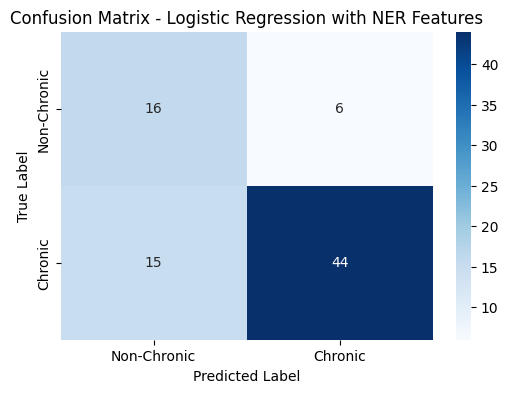

[('pain discomfort', 0.6467246238531801), ('has_duration', 0.5803322641583109), ('cognitive', 0.5648575572362287), ('intense', 0.5561668666595716), ('palpitations', 0.48106730472025766), ('increased', 0.472212065065738), ('tremors', 0.4598160047280765), ('numbness tingling', 0.44937344761909903), ('blood', 0.439760397089192), ('chest pain', 0.43836578109922214), ('shortness', 0.4372234926599673), ('shortness breath', 0.4372234926599673), ('levels', 0.43030883892507715), ('stiffness', 0.4245737834418617), ('mood', 0.41402773179406716), ('food', 0.40988702710326774), ('excessive', 0.4044666532355564), ('sweating', 0.40371185676925425), ('stools', 0.4029899034036042), ('walking', 0.39278949695640286)]
[('eye', -1.276211457161285), ('swelling', -1.1849492627154004), ('swelling pain', -1.1492782350002309), ('painless', -1.0501156642372815), ('itchy', -1.046624640053125), ('rash', -1.0023755740752074), ('swollen', -0.9441361425273781), ('lymph', -0.7866587172117196), ('redness', -0.762864376

In [6]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

nlp = spacy.load("en_core_sci_md") # biomedical NER model

def extract_ner_features(text):
    doc = nlp(text)

    features = {
        "n_entities": 0,
        "n_symptoms": 0,
        "n_diseases": 0,
        "n_conditions": 0,
        "has_chronic_keyword": 0,
        "has_duration": 0
    }

    chronic_keywords = {
        "chronic", "long-term", "persistent",
        "recurrent", "for years", "since childhood"
    }

    duration_keywords = {
        "months", "years", "since", "for", "long"
    }

    text_lower = text.lower()

    features["has_chronic_keyword"] = int(
        any(k in text_lower for k in chronic_keywords)
    )

    features["has_duration"] = int(
        any(k in text_lower for k in duration_keywords)
    )

    for ent in doc.ents:
        features["n_entities"] += 1

        if ent.label_.upper() in {"SYMPTOM", "SIGN"}:
            features["n_symptoms"] += 1
        elif ent.label_.upper() in {"DISEASE", "DISORDER"}:
            features["n_diseases"] += 1
        elif ent.label_.upper() in {"CONDITION"}:
            features["n_conditions"] += 1

    return features


df = pd.read_csv("../resources/medical/Diseases_Symptoms.csv")
df["Chronic"] = df["Chronic"].astype(int)

ner_features = df["Symptoms"].apply(extract_ner_features)
X_ner = pd.DataFrame(ner_features.tolist())

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    stop_words="english",
    min_df=2
)

X_text = tfidf.fit_transform(df["Symptoms"])

# combine text + NER features
# horizontal stack (column-wise) It concatenates matrices side-by-side, not top-to-bottom.
X = hstack([X_text, X_ner])
y = df["Chronic"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# clf = XGBClassifier(
#     n_estimators=300,
#     max_depth=6,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective="binary:logistic",
#     eval_metric="logloss",
#     scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
#     random_state=42
# )

# clf.fit(X_train.toarray(), y_train)
# y_pred = clf.predict(X_test.toarray())

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Chronic", "Chronic"], yticklabels=["Non-Chronic", "Chronic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression with NER Features")
plt.show()

# model imterpretation
feature_names = list(tfidf.get_feature_names_out()) + list(X_ner.columns)
coef = clf.coef_[0]

top_chronic = sorted(
    zip(feature_names, coef),
    key=lambda x: x[1],
    reverse=True
)[:20]

top_non_chronic = sorted(
    zip(feature_names, coef),
    key=lambda x: x[1]
)[:20]

print(top_chronic)
print(top_non_chronic)

## Syntetic generation of symptomps description with LLM

Only run this once!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from openai import OpenAI
import os

load_dotenv()
SECRET_KEY = os.getenv("OPEN_API_KEY")

data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

data['symptomps_text'] = ""
print(len(data))
# display(data.head(10))

client = OpenAI(api_key=SECRET_KEY)

def generate_text(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a customer giving honest feedback."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.9, # may be try variate temperature
        max_tokens=120
    )
    return response.choices[0].message.content

template = """Given these symptomps in a comma-separated list, please write a short text, as if you were a patient 
describing your symptomps. List: [list]. Please, consider, that for this patient, the doctror's decision is, that they require: 
[treatment_plan]. The patient has not seen any doctor yet, so they are not aware of the treatment plan. 
The text should be in the first person."""

def save_response(i, text):
    with open("../resources/medical/symptoms_text_2.txt", "a", encoding="utf-8") as f:
        f.write(f"{i}||{text}\n")

def generate_symptomps_text(i):
    symptomps_list = ", ".join([data.iloc[i]["Symptom_1"], data.iloc[i]["Symptom_2"], data.iloc[i]["Symptom_3"]]) 
    treatment_plan = data.iloc[i]["Treatment_Plan"]
    prompt = template.replace("[list]", symptomps_list).replace("[treatment_plan]", treatment_plan)
    # print(prompt)
    response = generate_text(prompt)
    save_response(i, response)

# generate_symptomps_text(0)

for i in range(1000, 2000):
    generate_symptomps_text(i)
# display(data.head(10))


2000


In [16]:
import pandas as pd

data = pd.read_csv('../resources/medical/disease_diagnosis.csv')
data['symptomps_text'] = ""

with open("../resources/medical/symptoms_text_2.txt", "r", encoding="utf-8") as f:
    for line in f:
        index, text = line.strip().split("||")
        index = int(index)
        data.at[index, "symptomps_text"] = text

display(data.head(10))

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,symptomps_text
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest,I've been feeling really off lately. It starte...
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids,I've been feeling quite unwell lately. It star...
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,Flu,Moderate,Medication and rest,"For the past few days, I’ve been feeling prett..."
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,Bronchitis,Severe,Hospitalization and medication,I've been feeling really unwell lately. It sta...
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,Healthy,Mild,Rest and fluids,"For the past few days, I've been feeling quite..."
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,Cold,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,Flu,Moderate,Medication and rest,"For the past few days, I've been feeling reall..."


In [2]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['symptomps_text'].apply(str).apply(vectorize_text)
display(data.head(10))

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,symptomps_text,Text_Vector
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest,I've been feeling really off lately. It starte...,"[-0.1472735, 0.3109661, 0.4390001, -0.35014328..."
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...,"[-0.10493994, 0.24020605, 0.36484942, -0.28279..."
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...,"[-0.15536764, 0.2591507, 0.45269042, -0.291200..."
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids,I've been feeling quite unwell lately. It star...,"[-0.12268587, 0.27280155, 0.4223409, -0.301836..."
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...,"[-0.10236938, 0.23730208, 0.46209443, -0.35465..."
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,Flu,Moderate,Medication and rest,"For the past few days, I’ve been feeling prett...","[-0.12566462, 0.22178137, 0.3602296, -0.307067..."
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,Bronchitis,Severe,Hospitalization and medication,I've been feeling really unwell lately. It sta...,"[-0.08808433, 0.31299856, 0.43372482, -0.35826..."
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,Healthy,Mild,Rest and fluids,"For the past few days, I've been feeling quite...","[-0.10756708, 0.26782015, 0.44110093, -0.33598..."
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,Cold,Mild,Rest and fluids,I've been feeling really unwell lately. It sta...,"[-0.11672767, 0.24345095, 0.41993025, -0.29387..."
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,Flu,Moderate,Medication and rest,"For the past few days, I've been feeling reall...","[-0.08090826, 0.2730424, 0.4311522, -0.3470302..."


NEXT:
- Separate model for numerical (BayesianOptimization + XGBoost), separate for textual (Logistic regression/ NER/ transformers)
- Combine results of two models (FL)
- If high degree of confidence -> skip next step 

Accuracy: 0.8556
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        34
           1       0.83      0.58      0.68        26
           2       0.86      0.97      0.91       120

    accuracy                           0.86       180
   macro avg       0.85      0.74      0.78       180
weighted avg       0.85      0.86      0.85       180



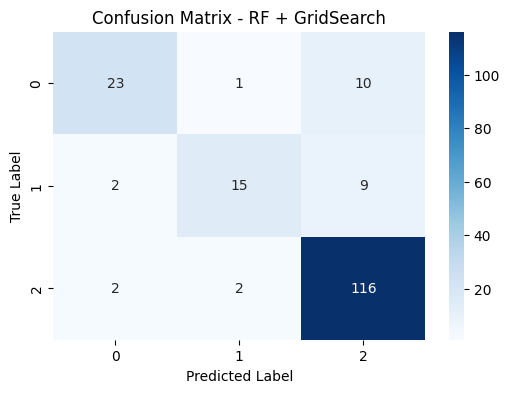

In [18]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

le = LabelEncoder()

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))

data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded']

X_num = data[numerical_features].values # return numpy representation of dataframe!
X_text = np.vstack(data['Text_Vector'].values) # convert column of vectors into a proper matrix!
y = data['Treatment_Plan_encoded']

Xnum_train, Xnum_test, Xtext_train, Xtext_test, y_train, y_test = train_test_split(
    X_num, X_text, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# train xgboost on numeric data
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, eval_metric="mlogloss")
xgb_model.fit(Xnum_train, y_train)

# train logistic regression on text vectors
log_model = LogisticRegression(max_iter=2000, class_weight="balanced")
log_model.fit(Xtext_train, y_train)

# generate probabilities
proba_num = xgb_model.predict_proba(Xnum_test)
proba_text = log_model.predict_proba(Xtext_test)

# concatenate model outputs
X_meta = np.hstack([proba_num, proba_text])

X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(X_meta, y_test, test_size=0.3,
    random_state=42,
    stratify=y_test)

meta_model = LogisticRegression(max_iter=2000)
meta_model.fit(X_meta_train, y_meta_train)

final_prediction = meta_model.predict(X_meta_test)


print(f"Accuracy: {accuracy_score(y_meta_test, final_prediction):.4f}")
print(classification_report(y_meta_test, final_prediction))

# confusion matrix:
cm = confusion_matrix(y_meta_test, final_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF + GridSearch")
plt.show()

idea 1: Feed numeric into MLP -> Feed text embeddings into Transformer encoder -> Concatenate latent vectors -> Predict jointly

idea 2: FL + GA

idea 3: NER 

idea 4: Clusterization (!)

Also
- may be try different text generation (pass to llm the conclusion of treatment plan?)

Execution: 1.5s - try metaoptimizer? if prediction $f(a) = \alpha f_{num}(a) + (1 - \alpha) f_{text}(a)$, try optimize for best $\alpha$ 

## Fuzzy-logic based metalearner

FL based metalearner will predict the outcome based on two models (numerical and textual predictions)

In [5]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

600 600
===== FUZZY META MODEL =====
Accuracy: 0.7066666666666667
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       113
           1       0.53      0.42      0.47        88
           2       0.76      0.87      0.81       399

    accuracy                           0.71       600
   macro avg       0.62      0.55      0.57       600
weighted avg       0.69      0.71      0.69       600



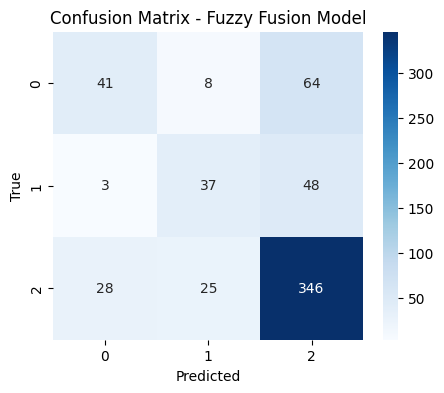

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import pandas as pd

data = pd.read_csv('../resources/medical/disease_diagnosis.csv')
data['symptomps_text'] = ""

with open("../resources/medical/symptoms_text_2.txt", "r", encoding="utf-8") as f:
    for line in f:
        index, text = line.strip().split("||")
        index = int(index)
        data.at[index, "symptomps_text"] = text

# display(data.head(10))
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['symptomps_text'].apply(str).apply(vectorize_text)
# display(data.head(10))


le = LabelEncoder()

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))

data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded']

X_num = data[numerical_features].values # return numpy representation of dataframe!
X_text = np.vstack(data['Text_Vector'].values) # convert column of vectors into a proper matrix!
y = data['Treatment_Plan_encoded']

Xnum_train, Xnum_test, Xtext_train, Xtext_test, y_train, y_test = train_test_split(
    X_num, X_text, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# train xgboost on numeric data
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, eval_metric="mlogloss")
xgb_model.fit(Xnum_train, y_train)

# train logistic regression on text vectors
log_model = LogisticRegression(max_iter=2000, class_weight="balanced")
log_model.fit(Xtext_train, y_train)

# generate probabilities
proba_num = xgb_model.predict_proba(Xnum_test)
proba_text = log_model.predict_proba(Xtext_test)




# Fuzzy logic implementation for metaa-learner
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

conf_num  = np.max(proba_num, axis=1)
conf_text = np.max(proba_text, axis=1)

confidence_num = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'confidence_num')
confidence_text = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'confidence_text')
final_confidence = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'final_confidence')

confidence_num['low'] = fuzz.trimf(confidence_num.universe, [0, 0, 0.5])
confidence_num['medium'] = fuzz.trimf(confidence_num.universe, [0.3, 0.5, 0.7])
confidence_num['high'] = fuzz.trimf(confidence_num.universe, [0.5, 1, 1])

confidence_text['low'] = fuzz.trimf(confidence_text.universe, [0, 0, 0.5])
confidence_text['medium'] = fuzz.trimf(confidence_text.universe, [0.3, 0.5, 0.7])
confidence_text['high'] = fuzz.trimf(confidence_text.universe, [0.5, 1, 1])

final_confidence['low'] = fuzz.trimf(final_confidence.universe, [0, 0, 0.5])
final_confidence['medium'] = fuzz.trimf(final_confidence.universe, [0.3, 0.5, 0.7])
final_confidence['high'] = fuzz.trimf(final_confidence.universe, [0.5, 1, 1])

rule1 = ctrl.Rule(confidence_num['high'] & confidence_text['high'], final_confidence['high'])

rule2 = ctrl.Rule(confidence_num['high'] & confidence_text['medium'], final_confidence['high'])

rule3 = ctrl.Rule(confidence_num['medium'] & confidence_text['high'], final_confidence['high'])

rule4 = ctrl.Rule(confidence_num['medium'] & confidence_text['medium'], final_confidence['medium'])

rule5 = ctrl.Rule(confidence_num['low'] & confidence_text['high'], final_confidence['medium'])

rule6 = ctrl.Rule(confidence_num['high'] & confidence_text['low'], final_confidence['medium'])

rule7 = ctrl.Rule(confidence_num['low'] & confidence_text['low'], final_confidence['low'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_model = ctrl.ControlSystemSimulation(control_system)

final_predictions = []

for i in range(len(conf_num)):
    
    fuzzy_model.input['confidence_num'] = conf_num[i]
    fuzzy_model.input['confidence_text'] = conf_text[i]
    
    fuzzy_model.compute()
    
    fused_conf = fuzzy_model.output['final_confidence']
    
    # choose class from stronger model
    if proba_num[i].max() > proba_text[i].max():
        chosen_class = np.argmax(proba_num[i])
    else:
        chosen_class = np.argmax(proba_text[i])
    
    final_predictions.append(chosen_class)

pred_fuzzy = np.array(final_predictions)
y_true = y_test
print(len(pred_fuzzy), len(y_true))

print("===== FUZZY META MODEL =====")
print("Accuracy:", accuracy_score(y_true, pred_fuzzy))
print(classification_report(y_true, pred_fuzzy))

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_cm(y_true, pred_fuzzy, "Confusion Matrix - Fuzzy Fusion Model")

Summer 

Temperature, humidity

if high t, h -> bad feeling;

29, 90%

fuzzy input, fuzzy output;

.8, .2 

,Oxygen_Saturation_%_scaled,Heart_Rate_bpm_scaled,Body_Temperature_C_scaled,Blood_Pressure_mmHg_upper_scaled,Age_scaled,Gender_encoded,Treatment_Plan_encoded,Treatment_Plan
0,0.444444,0.152542,0.866667,0.471910,0.918033,1,1,Medication and rest
1,0.888889,0.593220,0.777778,0.943820,0.786885,0,2,Rest and fluids
2,0.666667,0.288136,0.288889,0.516854,0.229508,1,2,Rest and fluids
3,1.000000,0.203390,0.755556,0.640449,0.049180,0,2,Rest and fluids
4,0.222222,0.677966,0.244444,0.213483,0.573770,1,2,Rest and fluids
5,0.333333,0.508475,0.888889,0.191011,0.065574,1,1,Medication and rest
6,0.333333,0.186441,0.444444,0.404494,0.049180,1,0,Hospitalization and medication
7,1.000000,0.067797,0.688889,0.707865,0.868852,1,2,Rest and fluids
8,0.666667,0.728814,0.155556,0.696629,0.622951,0,2,Rest and fluids
9,0.888889,0.033898,0.888889,0.235955,0.573770,1,1,Medication and rest


0.8586150220538745


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


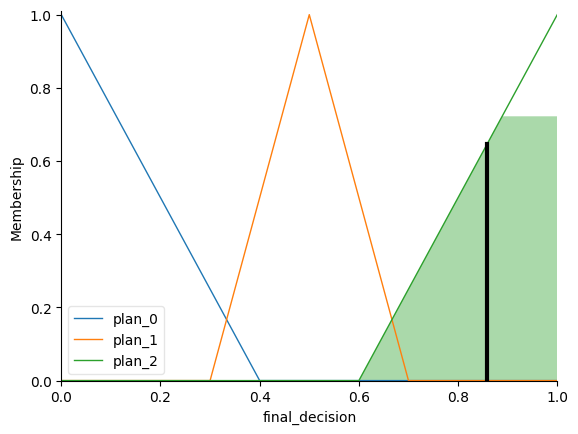

In [7]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

le = LabelEncoder()

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))
data['Oxygen_Saturation_%_scaled'] = (data['Oxygen_Saturation_%'] - min(data['Oxygen_Saturation_%'])) / (max(data['Oxygen_Saturation_%']) - min(data['Oxygen_Saturation_%']))
data['Heart_Rate_bpm_scaled'] = (data['Heart_Rate_bpm'] - min(data['Heart_Rate_bpm'])) / (max(data['Heart_Rate_bpm']) - min(data['Heart_Rate_bpm']))
data['Blood_Pressure_mmHg_upper_scaled'] = (data['Blood_Pressure_mmHg_upper'] - min(data['Blood_Pressure_mmHg_upper'])) / (max(data['Blood_Pressure_mmHg_upper']) - min(data['Blood_Pressure_mmHg_upper']))
data['Age_scaled'] = (data['Age'] - min(data['Age'])) / (max(data['Age']) - min(data['Age']))



data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])


numerical_features = ['Oxygen_Saturation_%_scaled', 'Heart_Rate_bpm_scaled', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper_scaled', 'Age_scaled', 'Gender_encoded']

display(data[numerical_features + ['Treatment_Plan_encoded', 'Treatment_Plan']].head(10))


age_antcd = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'age')
heart_antcd = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'heart_rate')
oxygen_antcd = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'oxygen_saturation')

age_antcd['low'] = fuzz.trimf(age_antcd.universe, [0, 0, 0.4])
age_antcd['medium'] = fuzz.trimf(age_antcd.universe, [0.3, 0.5, 0.7])
age_antcd['high'] = fuzz.trimf(age_antcd.universe, [0.6, 1, 1])

heart_antcd['low'] = fuzz.trimf(heart_antcd.universe, [0, 0, 0.4])
heart_antcd['medium'] = fuzz.trimf(heart_antcd.universe, [0.3, 0.5, 0.7])
heart_antcd['high'] = fuzz.trimf(heart_antcd.universe, [0.6, 1, 1])

oxygen_antcd['low'] = fuzz.trimf(oxygen_antcd.universe, [0, 0, 0.4])
oxygen_antcd['medium'] = fuzz.trimf(oxygen_antcd.universe, [0.3, 0.5, 0.7])
oxygen_antcd['high'] = fuzz.trimf(oxygen_antcd.universe, [0.6, 1, 1])

final_decision = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'final_decision')
final_decision['plan_0'] = fuzz.trimf(final_decision.universe, [0, 0, 0.4])
final_decision['plan_1'] = fuzz.trimf(final_decision.universe, [0.3, 0.5, 0.7])
final_decision['plan_2'] = fuzz.trimf(final_decision.universe, [0.6, 1, 1])

rule1 = ctrl.Rule(age_antcd['high'] & heart_antcd['high'] & oxygen_antcd['low'], final_decision['plan_0'])
rule2 = ctrl.Rule(age_antcd['low'] | heart_antcd['low'] | oxygen_antcd['medium'], final_decision['plan_2'])

control_system = ctrl.ControlSystem([rule1, rule2])
fuzzy_model = ctrl.ControlSystemSimulation(control_system)

final_predictions = []

fuzzy_model.input['age'] = 0.918033	
fuzzy_model.input['heart_rate'] = 0.152542	
fuzzy_model.input['oxygen_saturation'] = 0.444444

fuzzy_model.compute()
print(fuzzy_model.output['final_decision'])
final_decision.view(sim=fuzzy_model)


# for i in range(len(data)):
#     fuzzy_model.input['age'] = data.iloc[i]['Age_scaled']
#     fuzzy_model.input['heart_rate'] = data.iloc[i]['Heart_Rate_bpm_scaled']
#     fuzzy_model.input['oxygen_saturation'] = data.iloc[i]['Oxygen_Saturation_%_scaled']
    
#     fuzzy_model.compute()
    
#     fused_decision = fuzzy_model.output['final_decision']
    
#     if fused_decision < 0.5:
#         final_predictions.append(0)
#     elif fused_decision < 0.7:
#         final_predictions.append(1)
#     else:
#         final_predictions.append(2)


